In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File to Load
tsa_file = "../Resources/TSA_checkpoint.csv"

# Read School and Student Data File and store into Pandas DataFrames
tsa_data = pd.read_csv(tsa_file, thousands=',')

tsa_data

,Date,Total Traveler Throughput,Total Traveler Throughput (1 Year Ago - Same Weekday)
0,12/31/20,874406,2392331
1,12/30/20,1163696,2133253
2,12/29/20,1019347,2009880
3,12/28/20,1111751,2500396
4,12/27/20,1284599,2575985
...,...,...,...
292,3/5/20,2130015,2402692
293,3/4/20,1877401,2143619
294,3/3/20,1736393,1979558
295,3/2/20,2089641,2257920


In [2]:
#Cleaning the dataframe
#Rename the columns
tsa_df = tsa_data.rename(columns={"Total Traveler Throughput":"Traveler Throughput 2020", "Total Traveler Throughput (1 Year Ago - Same Weekday)":"Traveler Throughput 2019"})

#Convert the "Date" column to Pandas yymmdd format
tsa_df["Date"] = pd.to_datetime(tsa_df["Date"])

#Extract just the month and date from the "Date" column 
tsa_df['Month/Date'] = tsa_df['Date'].dt.strftime('%m-%d')

#The columns are the wrong data type. Convert the throughput columns from object to numeric.
tsa_df["Traveler Throughput 2019"] = pd.to_numeric(tsa_df["Traveler Throughput 2019"])
tsa_df["Traveler Throughput 2020"] = pd.to_numeric(tsa_df["Traveler Throughput 2020"])

#Delete the Date column and reorder the columns
# del tsa_df["Date"]
tsa_df = tsa_df [["Date", "Month/Date", "Traveler Throughput 2019", "Traveler Throughput 2020"]]

tsa_df


,Date,Month/Date,Traveler Throughput 2019,Traveler Throughput 2020
0,2020-12-31,12-31,2392331,874406
1,2020-12-30,12-30,2133253,1163696
2,2020-12-29,12-29,2009880,1019347
3,2020-12-28,12-28,2500396,1111751
4,2020-12-27,12-27,2575985,1284599
...,...,...,...,...
292,2020-03-05,03-05,2402692,2130015
293,2020-03-04,03-04,2143619,1877401
294,2020-03-03,03-03,1979558,1736393
295,2020-03-02,03-02,2257920,2089641


## Analysis

In [3]:
#Create a new column that calculates the percent change between 2019 and 2020 passengers
tsa_df["Percent Change"] = (tsa_df["Traveler Throughput 2020"] - tsa_df["Traveler Throughput 2019"]) / tsa_df["Traveler Throughput 2020"]

#Format the results to percentage 
tsa_df["Percent Change"] = tsa_df["Percent Change"].map("{:,.2%}".format)

tsa_df

,Date,Month/Date,Traveler Throughput 2019,Traveler Throughput 2020,Percent Change
0,2020-12-31,12-31,2392331,874406,-173.59%
1,2020-12-30,12-30,2133253,1163696,-83.32%
2,2020-12-29,12-29,2009880,1019347,-97.17%
3,2020-12-28,12-28,2500396,1111751,-124.91%
4,2020-12-27,12-27,2575985,1284599,-100.53%
...,...,...,...,...,...
292,2020-03-05,03-05,2402692,2130015,-12.80%
293,2020-03-04,03-04,2143619,1877401,-14.18%
294,2020-03-03,03-03,1979558,1736393,-14.00%
295,2020-03-02,03-02,2257920,2089641,-8.05%


In [4]:
#We will pull 2 busiest US travel days (holidays) and look at the difference 
#Before Christmas (December 23rd) and before US Independence Day (July 3rd)

#Extract the data for before Christmas, December 23rd using loc
before_christmas = tsa_df.loc[tsa_df["Month/Date"] == "12-23"]
before_christmas

,Date,Month/Date,Traveler Throughput 2019,Traveler Throughput 2020,Percent Change
8,2020-12-23,12-23,1937235,1191123,-62.64%


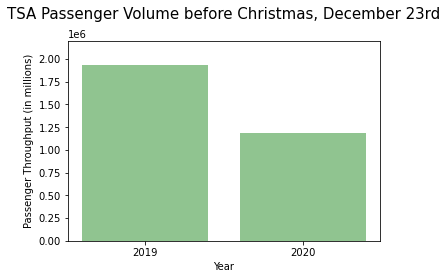

In [5]:
#Create a bar graph showing the difference in passenger count before Christmas
christmas_volumes = [1937235, 1191123]
christmas_year = [2019, 2020]
plt.bar(christmas_year, christmas_volumes, color='forestgreen', alpha=0.5, align="center")
tick_locations = [value for value in christmas_year]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,2200000)

#Label the axis
plt.title("TSA Passenger Volume before Christmas, December 23rd", fontsize=15, y=1.08)
plt.xlabel("Year")
plt.ylabel("Passenger Throughput (in millions)")

plt.tight_layout()
plt.savefig("../output_data/TSA Passenger Volume before Christmas.png")
plt.show()


In [6]:
#Extract the data pertaining to July 3rd (day before Independence Day) using loc
before_independence_day = tsa_df.loc[tsa_df["Month/Date"] == "06-03"]
before_independence_day

,Date,Month/Date,Traveler Throughput 2019,Traveler Throughput 2020,Percent Change
202,2020-06-03,06-03,2370152,304436,-678.54%


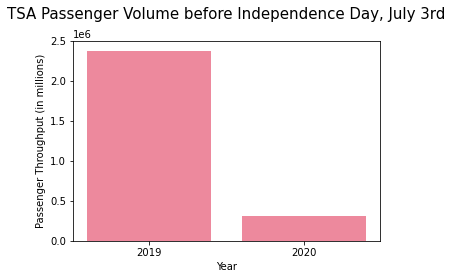

In [7]:
#Create a bar graph showing the difference in passenger count before Independence Day
independence_volumes = [2370152, 304436]
independence_year = [2019, 2020]
plt.bar(independence_year, independence_volumes, color='crimson', alpha=0.5, align="center")
tick_locations = [value for value in independence_year]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,2500000)

#Label the axis
plt.title("TSA Passenger Volume before Independence Day, July 3rd", fontsize=15, y=1.08)
plt.xlabel("Year")
plt.ylabel("Passenger Throughput (in millions)")

plt.tight_layout()
plt.savefig("../output_data/TSA Passenger Volume before Independece Day.png")
plt.show()

In [8]:
#Group the "Date" column by month so we can find the total passengers by each month for 2019 and 2020
tsa_groupedby_month = tsa_df.groupby(pd.Grouper(key='Date', freq='1M')).sum() # groupby each 1 month
tsa_groupedby_month.index = tsa_groupedby_month.index.strftime('%B')

tsa_groupedby_month

,Traveler Throughput 2019,Traveler Throughput 2020
Date,,
March,72680065,35139502
April,70124591,3287008
May,74499253,7165829
June,76619900,14481802
July,79511968,20740781
August,74776010,21708071
September,66531258,21488263
October,72096495,25636496
November,68787654,25512987


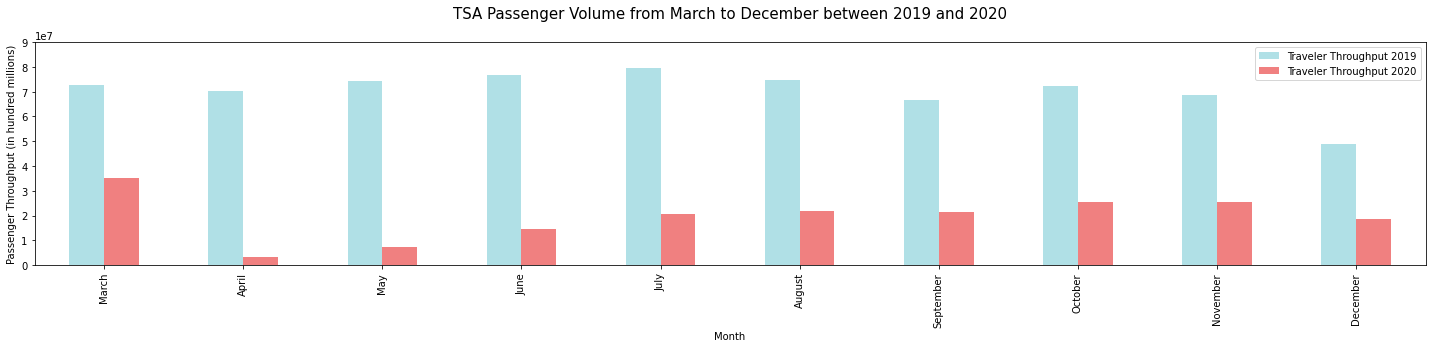

In [9]:
#Create a bar plot displaying the passenger volume between 2019 and 2020
colors = ["powderblue", "lightcoral"]
multi_plot = tsa_groupedby_month.plot(kind="bar", figsize=(20,5), color=colors)
plt.ylim(0,90000000)

#Label the axis
plt.title("TSA Passenger Volume from March to December between 2019 and 2020", fontsize=15, y=1.08)
plt.xlabel("Month")
plt.ylabel("Passenger Throughput (in hundred millions)")

plt.tight_layout()
plt.savefig("../output_data/TSA Passenger Volume Across All Months.png")
plt.show()

In [10]:
#Create a new column that calculated the percent change in the new groupedby df
tsa_groupedby_month["Percent Change"] = (tsa_groupedby_month["Traveler Throughput 2020"] - tsa_groupedby_month["Traveler Throughput 2019"]) / tsa_groupedby_month["Traveler Throughput 2020"] * 100

tsa_groupedby_month

,Traveler Throughput 2019,Traveler Throughput 2020,Percent Change
Date,,,
March,72680065,35139502,-106.832940
April,70124591,3287008,-2033.386685
May,74499253,7165829,-939.645978
June,76619900,14481802,-429.077113
July,79511968,20740781,-283.360530
August,74776010,21708071,-244.461790
September,66531258,21488263,-209.616734
October,72096495,25636496,-181.226011
November,68787654,25512987,-169.618191


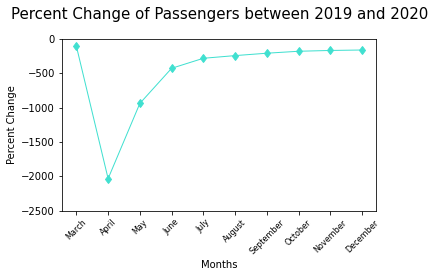

In [11]:
#Convert the percent change column from object to float so we can chart it
tsa_groupedby_month["Percent Change"] = tsa_groupedby_month["Percent Change"].astype(float)

#Create a line chart that plots the percent change over the months 
months = ["March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
pct_change_month = tsa_groupedby_month["Percent Change"]

plt.plot(months, pct_change_month, marker="d", color="turquoise", linewidth=1)
plt.title("Percent Change of Passengers between 2019 and 2020", fontsize=15, y=1.08)
plt.xlabel("Months")
plt.ylabel("Percent Change")
plt.ylim(-2500,0)
plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.savefig("../output_data/TSA Passenger Percent Change.png")
plt.show()